<a href="https://colab.research.google.com/github/yoshioakio/UAS-Artificial_Intelegence-Muhamad_Fajri_Permana_Haryanto-20220801439/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tahap Penerapan Algoritma Machine Learning (Unsupervised) Clustering K-means**

🎯 Pada tahap ini, akan dilakukan proses clustering yang berguna untuk mengelompokkan film/TV show berdasarkan tahun rilis, rating, dan durasi. Proses ini memungkinkan kita untuk mengidentifikasi pola tersembunyi, seperti kecenderungan film dengan durasi panjang mendapatkan rating tertentu.

📌 Unsupervised Learning:
" Bagaimana cara mengelompokkan film/TV Show berdasarkan karakteristik tertentu agar bisa menemukan pola tersembunyi?"

# **1. Import Liblary**

🗃️liblary pyhton yang digunakana untuk pembangunan model algoritma machine learning (unsupervised) ini

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

🗃️ karena memakai data hasil dari tahap pemrosesan data yang disimpan di google drive di tahap sebelumnnya, maka untuk itu diperlukan mengimport/memanggil data tersebut di google drive agar bisa dilakukan analisis data dan pembangunan model algoritma.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset**

📟 Untuk memanggil datasetnya, harap disesuaikan dengan tempat menyimpan dataset tersebut.

In [ ]:
clus_df = pd.read_csv("/content/drive/MyDrive/dataset/ArtificialIntelegence/final_dataset.csv")
clus_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_encoded,country_encoded,genre_encoded,duration_minutes,rating_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,notknown,United States,"September 25, 2021",1.0,0.75,90 min,Documentary & Biography,"As her father nears the end of his life, filmm...",0.0,0.9,0.333333,0.017069,0.30
1,s2,TV Show,Blood & Water,notknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Others,"September 24, 2021",1.0,0.50,2 Seasons,Drama,"After crossing paths at a party, a Cape Town t...",1.0,0.5,0.416667,0.117128,0.25
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",notknown,"September 24, 2021",1.0,0.50,1 Season,Action & Adventure,To protect his family from a powerful drug lor...,1.0,1.0,0.000000,0.058270,0.00
3,s4,TV Show,Jailbirds New Orleans,notknown,notknown,notknown,"September 24, 2021",1.0,0.50,1 Season,Others,"Feuds, flirtations and toilet talk go down amo...",1.0,1.0,0.833333,0.058270,0.50
4,s5,TV Show,Kota Factory,notknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",1.0,0.50,2 Seasons,International,In a city of coaching centers known to train I...,1.0,0.2,0.666667,0.117128,0.40


In [ ]:
clus_df.shape

(7810, 17)

In [ ]:
clus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           7810 non-null   object 
 1   type              7810 non-null   object 
 2   title             7810 non-null   object 
 3   director          7810 non-null   object 
 4   cast              7810 non-null   object 
 5   country           7810 non-null   object 
 6   date_added        7810 non-null   object 
 7   release_year      7810 non-null   float64
 8   rating            7810 non-null   float64
 9   duration          7810 non-null   object 
 10  listed_in         7810 non-null   object 
 11  description       7810 non-null   object 
 12  type_encoded      7810 non-null   float64
 13  country_encoded   7810 non-null   float64
 14  genre_encoded     7810 non-null   float64
 15  duration_minutes  7810 non-null   float64
 16  rating_genre      7810 non-null   float64


# **3. Pakai Fitur Yang Dipilih**

📌 Berdasarkan pertanyaan bisnis, berikut adalah fitur yang dipilih untuk proses clustering dengan penerapan algoritma k-means:

* ✅ **release_year** (Tahun rilis film)

* ✅ **duration_minutes** (Durasi film dalam menit)
* ✅ **type_encoded** (TV Show vs Movie)
* ✅ **country_encoded** (Negara produksi, setelah binning)
* ✅ **rating_genre_combined** (Gabungan Rating dan Genre)

In [ ]:
features = ['release_year', 'duration_minutes', 'type_encoded', 'country_encoded', 'rating_genre']

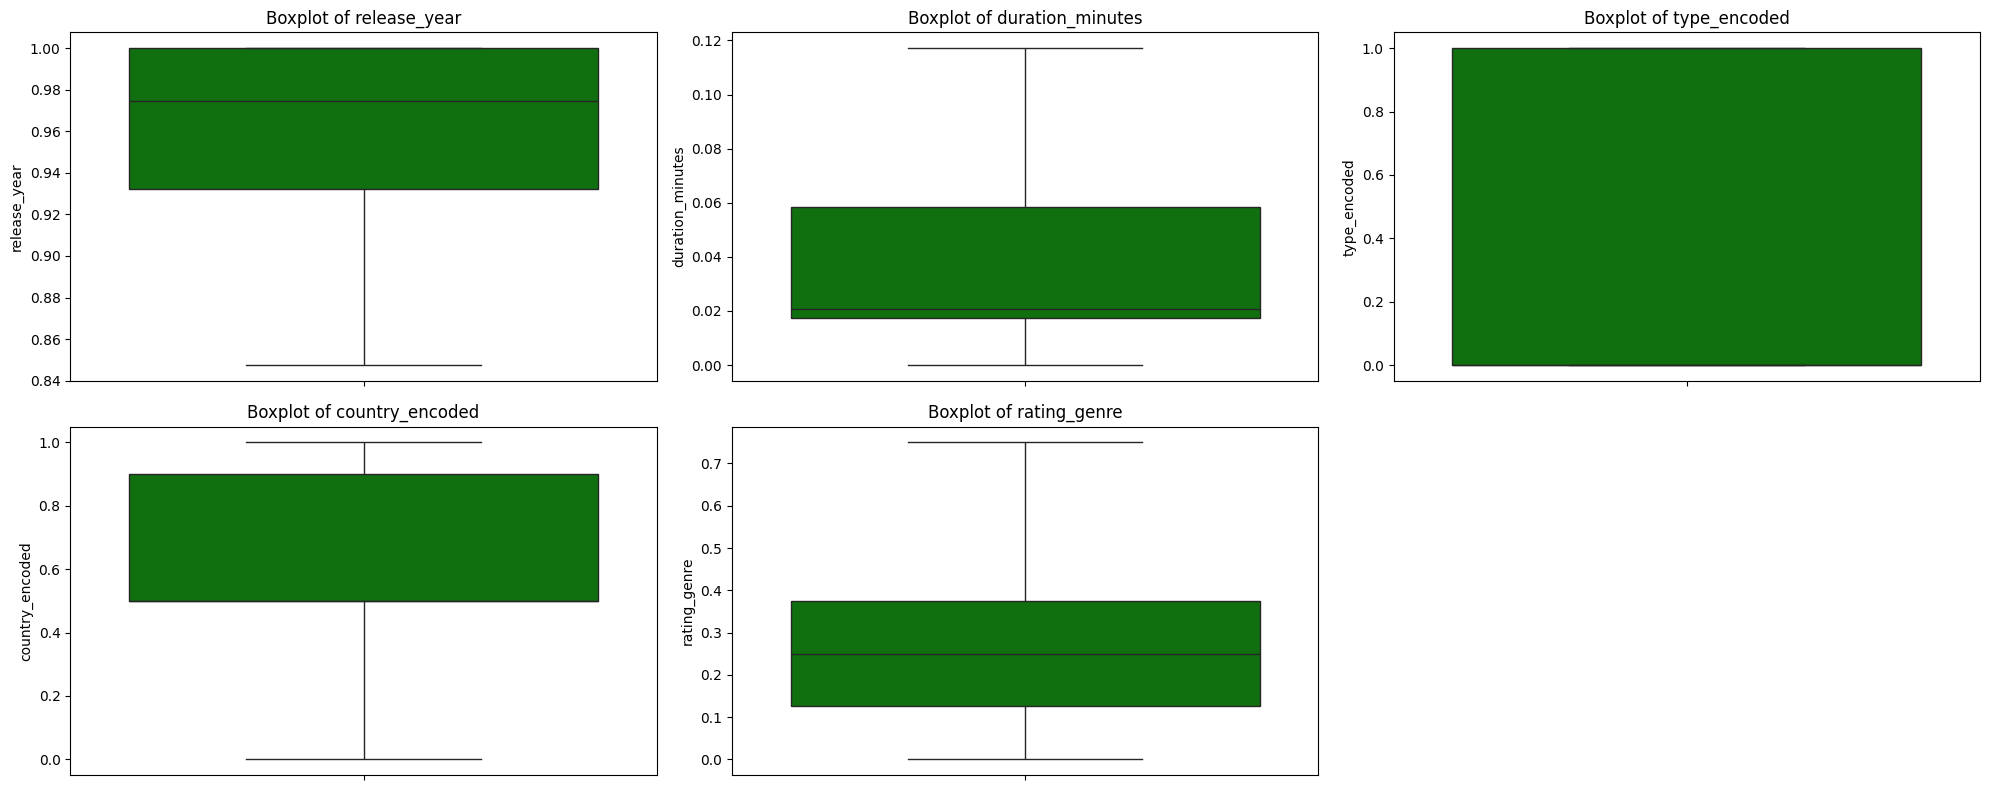

In [ ]:
plt.figure(figsize=(20, 8))
for i, column in enumerate(features, 1):
    plt.subplot(2, (len(features) + 1) // 2, i)
    sns.boxplot(data=clus_df, y=column, color="green")
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [ ]:
clus_df[features].head()

,release_year,duration_minutes,type_encoded,country_encoded,rating_genre
0,1.0,0.017069,0.0,0.9,0.30
1,1.0,0.117128,1.0,0.5,0.25
2,1.0,0.058270,1.0,1.0,0.00
3,1.0,0.058270,1.0,1.0,0.50
4,1.0,0.117128,1.0,0.2,0.40


# **4. Penetuan Jumlah Cluster Optimal**

## 1️⃣**Evaluasi dengan Elbow Method**

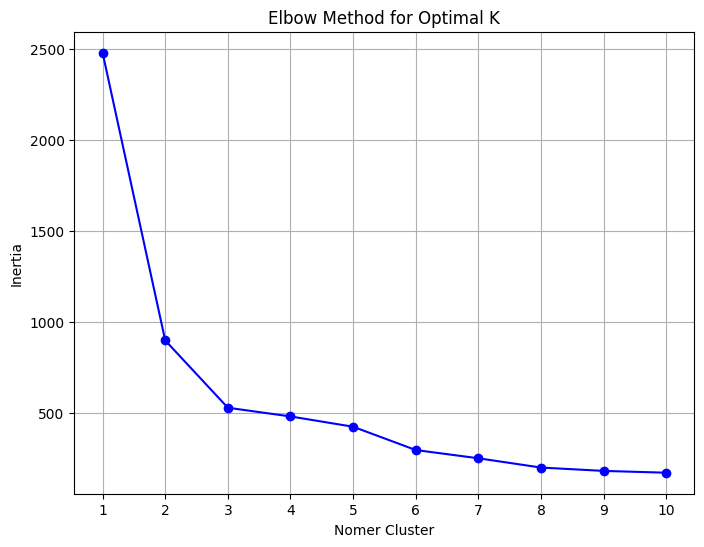

Jumlah cluster yang direkomendasikan berdasarkan Metode Elbow adalah: 2


In [ ]:
inertia_values = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(clus_df[features])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Nomer Cluster')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

inertia_diff = np.diff(inertia_values)
optimal_k = np.argmin(inertia_diff) + 2

print(f"Jumlah cluster yang direkomendasikan berdasarkan Metode Elbow adalah: {optimal_k}")

## 2️⃣**Hitung Silhouette Score sebagai ukuran kualitas cluster**

In [ ]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(clus_df[features])
    score = silhouette_score(clus_df[features], cluster_labels)
    silhouette_scores.append((k, score))

for k, score in silhouette_scores:
    print(f'k={k}, Silhouette Score={score:.4f}')

k=2, Silhouette Score=0.6191
k=3, Silhouette Score=0.5422
k=4, Silhouette Score=0.4839
k=5, Silhouette Score=0.4350
k=6, Silhouette Score=0.4021
k=7, Silhouette Score=0.4469
k=8, Silhouette Score=0.4432
k=9, Silhouette Score=0.4441
k=10, Silhouette Score=0.4308


Optimal k berdasarkan Silhouette Score: 2


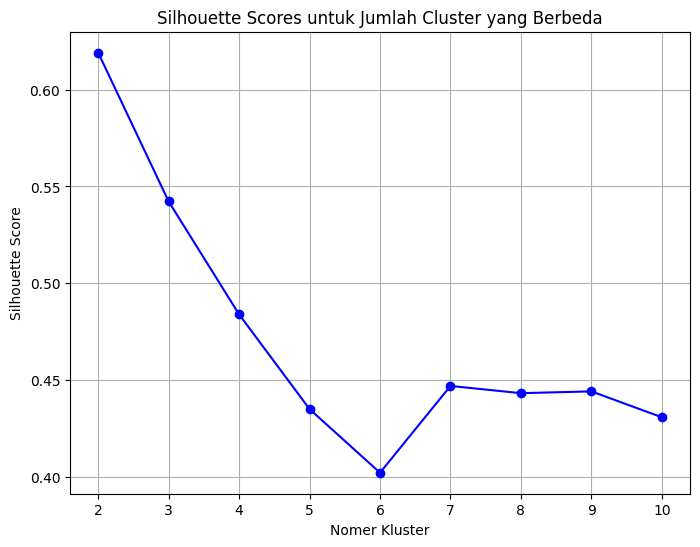

In [ ]:
optimal_k = max(silhouette_scores, key=lambda x: x[1])[0]
print(f'Optimal k berdasarkan Silhouette Score: {optimal_k}')

plt.figure(figsize=(8, 6))
plt.plot([k for k, _ in silhouette_scores], [score for _, score in silhouette_scores], marker='o', color='b')
plt.title('Silhouette Scores untuk Jumlah Cluster yang Berbeda')
plt.xlabel('Nomer Kluster')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

## 3️⃣**Evaluasi Hasil Elbow Dan Sillhoutte**

* Cluster yang dipilih untuk penerapan K-Means adalah 2 cluster.

* Berdasarkan Metode Elbow, jumlah cluster yang direkomendasikan adalah 2.

🫧 Maka diputuskan menggunakan pembagian **K=2** (opsi 2 cluster)

# **5. Pembangunan Model Clustering**

## **1️⃣ Latih model dengan data**

**🛠️ Pemilihan algoritma K-Means Clustering**

Didasarkan pada efisiensinya dalam menangani data numerik seperti tahun rilis, durasi film, tipe film, genre film dan lain sebagainnya. Algoritma ini bekerja optimal untuk data dengan cluster berbentuk bulat menggunakan jarak Euclidean, serta unggul dalam kecepatan dan skalabilitas, membuatnya cocok untuk dataset besar. Dengan karakteristik tersebut, K-Means dapat efektif dalam mengidentifikasi pola atau kelompok produk berdasarkan kemiripan atribut.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clus_df['cluster'] = kmeans.fit_predict(clus_df[features])
pca = PCA(n_components=2)
clus_df[['pca_x', 'pca_y']] = pca.fit_transform(clus_df[features])

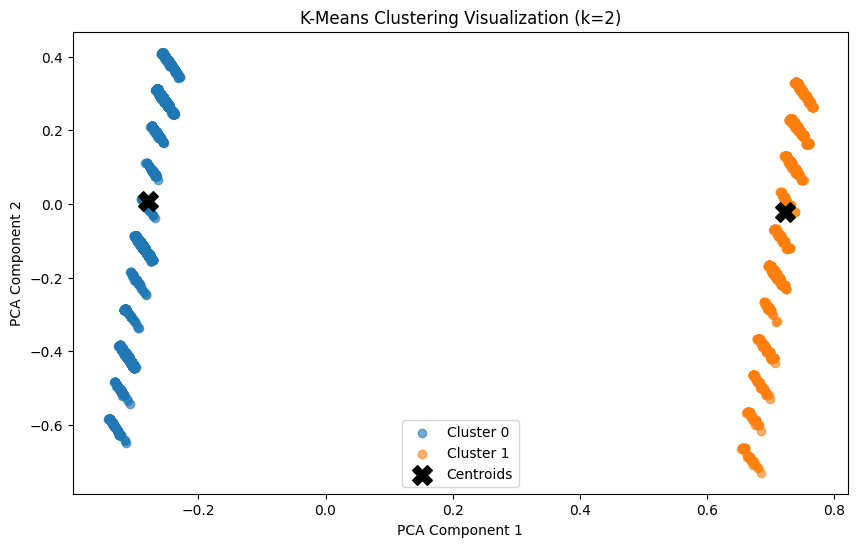

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in range(2):
    cluster_points = clus_df[clus_df['cluster'] == cluster]
    plt.scatter(cluster_points['pca_x'], cluster_points['pca_y'], label=f'Cluster {cluster}', alpha=0.6)

centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=clus_df[features].columns)
centroids_pca = pca.transform(centroids_df)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization (k=2)')
plt.legend()
plt.show()

## **2️⃣ Cek distribusi jumlah data di setiap cluster**

In [ ]:
cluster_counts = clus_df['cluster'].value_counts()
print("Jumlah data di setiap cluster:")
print(cluster_counts)

Jumlah data di setiap cluster:
cluster
0    5630
1    2180
Name: count, dtype: int64


## **3️⃣ Visualisasi dan Interpretasi Hasil Clustering**

In [ ]:
clus_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_encoded,country_encoded,genre_encoded,duration_minutes,rating_genre,cluster,pca_x,pca_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,notknown,United States,"September 25, 2021",1.0,0.75,90 min,Documentary & Biography,"As her father nears the end of his life, filmm...",0.0,0.9,0.333333,0.017069,0.30,0,-0.254058,0.284791
1,s2,TV Show,Blood & Water,notknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Others,"September 24, 2021",1.0,0.50,2 Seasons,Drama,"After crossing paths at a party, a Cape Town t...",1.0,0.5,0.416667,0.117128,0.25,1,0.710224,-0.189155
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",notknown,"September 24, 2021",1.0,0.50,1 Season,Action & Adventure,To protect his family from a powerful drug lor...,1.0,1.0,0.000000,0.058270,0.00,1,0.740289,0.329634
3,s4,TV Show,Jailbirds New Orleans,notknown,notknown,notknown,"September 24, 2021",1.0,0.50,1 Season,Others,"Feuds, flirtations and toilet talk go down amo...",1.0,1.0,0.833333,0.058270,0.50,1,0.757879,0.286052
4,s5,TV Show,Kota Factory,notknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",1.0,0.50,2 Seasons,International,In a city of coaching centers known to train I...,1.0,0.2,0.666667,0.117128,0.40,1,0.690403,-0.500070


In [ ]:
cluster_characteristics = clus_df.groupby('cluster').agg({
    'release_year': 'mean',
    'rating': 'mean',
    'type_encoded': 'mean',
    'country_encoded': 'mean',
    'genre_encoded': 'mean',
    'duration_minutes': 'mean',
    'rating_genre': 'mean',
})

cluster_characteristics

,release_year,rating,type_encoded,country_encoded,genre_encoded,duration_minutes,rating_genre
cluster,,,,,,,
0,0.962125,0.512478,0.0,0.618295,0.417525,0.018693,0.251075
1,0.978184,0.457913,1.0,0.670275,0.555734,0.069609,0.282167


### **🅰️ Visualisasi Grafik Bar Cluster 1 (0)**

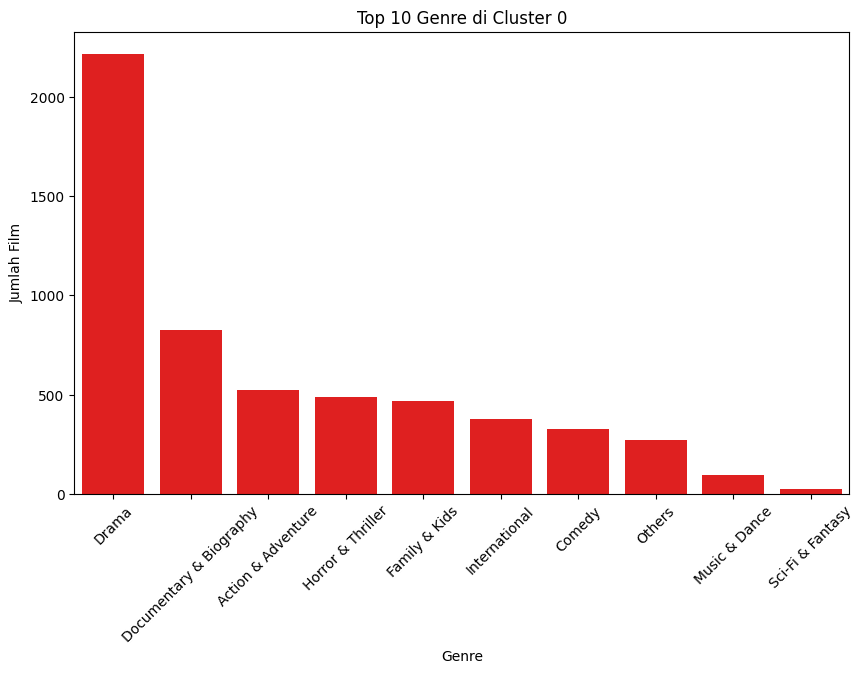

In [ ]:
cluster_0 = clus_df[clus_df['cluster'] == 0]
top_genres_0 = cluster_0['listed_in'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_0.index, y=top_genres_0.values, color='red')
plt.title("Top 10 Genre di Cluster 0")
plt.xlabel("Genre")
plt.ylabel("Jumlah Film")
plt.xticks(rotation=45)
plt.show()

### **🅱️ Visualisasi Grafik Bar Cluster 2 (1)**

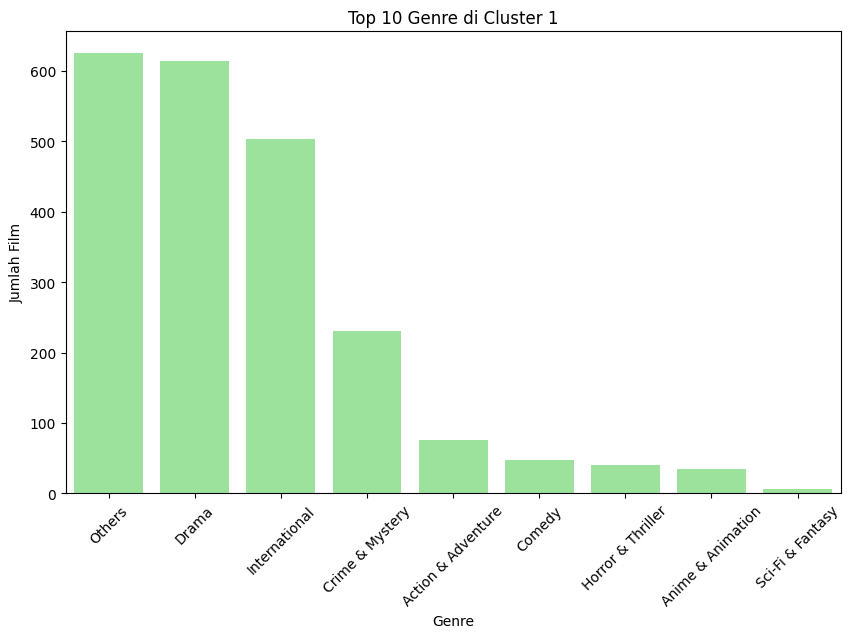

In [ ]:
cluster_1 = clus_df[clus_df['cluster'] == 1]
top_genres_1 = cluster_1['listed_in'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_1.index, y=top_genres_1.values, color='lightgreen')
plt.title("Top 10 Genre di Cluster 1")
plt.xlabel("Genre")
plt.ylabel("Jumlah Film")
plt.xticks(rotation=45)
plt.show()

# **6. Mengeksport Data**

In [ ]:
clus_df.to_csv('hasil_clus.csv', index=False)

**🔮 Sekarang dataset siap untuk tahap penerapan Supervised Learning! 🔥**